Now we have the data frame of values we want, we can use `predict`. Just as when we created log values, we can save the output back into a new column in the data frame:

In [19]:
predVals$predict <- predict(model, newdata = predVals)
print(predVals)

  GroundDwelling TrophicLevel   predict
1             No    Carnivore 0.9797572
2            Yes    Carnivore 1.1892226
3             No    Herbivore 1.0563447
4            Yes    Herbivore 1.2658102
5             No     Omnivore 1.1524491
6            Yes     Omnivore 1.3619145


Not that these are in the same order as the bars from your barplot. 

$\star$ Make a copy of the barplot and arrows code from above and modify it

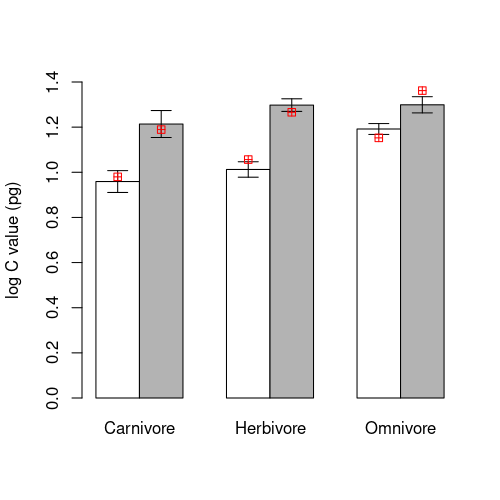

In [20]:
par(mfrow=c(1,1))
barMids <- barplot(groupMeans, ylim=c(0, 1.4), ylab='ln(wing length, mm)', beside=TRUE, col=c('white', 'grey70'))

arrows(barMids, upperSE, barMids, lowerSE, ang=90, code=3, len=0.1)
points(barMids, predVals$predict, col='red', pch=12)

The red markers do not match to the calculated means. This is because the model only includes a single difference between low-food and high-food level individuals, which has to be the same for each treatment group. That is, there is no interaction between temperature level and low-food / high-food identity of each treatment in the current model.

$\star$ Add the code for this plot to your script file.

# Linear Models: Multiple variables with interactions

## Introduction 

Here you will build on your skills in fitting linear models with multiple explanatory variables to data. You will learn about another commonly used Linear Model fitting technique: ANCOVA.

We will build two models in this section:

* **Model 1**: Is *Ae. aegypti* wing length predicted by interactions between temperature and food level?

* **ANCOVA**: Is body size in Odonata predicted by interactions between genome size and taxonomic suborder?

So far, we have only looked at the independent effects of variables. For example, in the temperature and food level model from the first multiple explanatory variables section, we only looked for specific differences for being exposed to low larval food supply *or* high larval food supply, not for being
specifically reared at a specific *temperature-food level treatment*. These independent effects of a variable are known as *main effects* and the effects of combinations of variables acting together are known as *interactions* — they describe how the variables *interact*.

### Section aims

The aims of this section are[$^{[1]}$](#fn1):

* Creating more complex Linear Models with multiple explanatory variables

* Including the effects of interactions between multiple variables in a linear model

* Plotting predictions from more complex (multiple explanatory variables) linear models


### Formulae with interactions in R

We've already seen a number of different model formulae in R. They all use this syntax:

`response variable ~ explanatory variable(s)`

But we are now going to see two extra pieces of syntax:

* `y ~ a + b + a:b`: The `a:b` means the interaction between `a` and `b` — do combinations of these variables lead to different outcomes?

* `y ~ a * b`:  This a shorthand for the model above. The means fit `a` and `b` as main effects and their interaction `a:b`. 

## Model 1: *Aedes aegypti* wing length

$\star$ Make sure you have changed the working directory to `Code` in your stats coursework directory.

$\star$ Create a new blank script called 'Interactions.R' and add some introductory comments.

$\star$ Read in the data:

In [11]:
read.csv('traitdata_Huxleyetal_2021.csv',stringsAsFactors = TRUE)

For practice, subset the dataset, define any categorical variables, and add any columns that might missing. Revist the previous sections, if you have forgotten what is needed!

Let's refit the model from the earlier multiple explanatory variable section, but including the interaction between temperature and food level. We'll immediately check the model is appropriate:

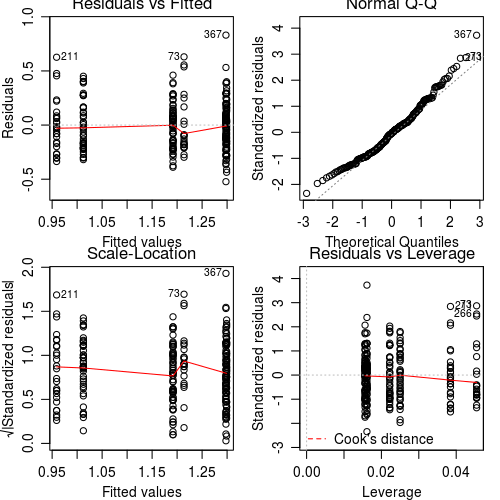

In [12]:
model <- lm(loglength ~ temp * food_level, data= wings)
par(mfrow=c(2,2), mar=c(3,3,1,1), mgp=c(2, 0.8,0))
plot(model)   

Now, examine the `anova` and `summary` outputs for the model:

In [13]:
anova(model)

Df  Sum Sq     Mean Sq    F value   Pr(>F)      
TrophicLevel                  2  0.8141063 0.40705316  8.061439 4.036387e-04
GroundDwelling                1  2.7469218 2.74692183 54.401106 2.335706e-12
TrophicLevel:GroundDwelling   2  0.4312875 0.21564376  4.270693 1.499280e-02
Residuals                   253 12.7749466 0.05049386        NA           NA

Compared to the model from the first multiple explanatory variables section, there is an extra line at the bottom. The top two are the same and show that temperature and food level both have independent main effects. The extra line
shows that there is also an interaction between the two. It doesn't explain very much variation, and it is non-significant.

Again, we can calculate the $r^2$ for the model: 

$\frac{0.59 + 0.97 + 0.01}{0.59 + 0.97 + 0.01 + 0.43} = 0.78$ 

The model from the first multiple explanatory variables section without the interaction had an $r^2 = 0.78$ — our new
model explains 0% more of the variation in the data.

The summary table is as follows:

In [14]:
summary(model)


Call:
lm(formula = logCvalue ~ TrophicLevel * GroundDwelling, data = mammals)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52294 -0.17069 -0.01003  0.11920  0.83057 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                              0.95895    0.04407  21.760  < 2e-16
TrophicLevelHerbivore                    0.05351    0.05535   0.967 0.334605
TrophicLevelOmnivore                     0.23281    0.05226   4.455 1.26e-05
GroundDwellingYes                        0.25487    0.06509   3.915 0.000116
TrophicLevelHerbivore:GroundDwellingYes  0.03033    0.07857   0.386 0.699791
TrophicLevelOmnivore:GroundDwellingYes  -0.14761    0.07930  -1.861 0.063839
                                           
(Intercept)                             ***
TrophicLevelHerbivore                      
TrophicLevelOmnivore                    ***
GroundDwellingYes                       ***
TrophicLevelHerbivore:GroundDwellingYes    

The lines in this output are:

1. The reference level (intercept) for low-food at 22oC. (The reference level is decided just by  alphabetic/numeric order of the levels)
2. Two differences for being in different food levels.
3. One difference for being high-food at 22oC.
4. Two new differences that give specific differences for high-food at 26 and 32oC.

The first four lines, as in the model from the ANOVA section, which would allow us to find the predicted values for each group *if the size of the differences did not vary between levels because of the interactions*. That is, this part of the model only includes a single difference low-food and high-food, which has to be the same for each temperature because it ignores interactions between temperature and low- / high-food identity of each treatment. The last two lines then give the estimated coefficients associated with the interaction terms, and allow cause the size of differences to vary
between levels because of the further effects of interactions.

The table below show how these combine to give the predictions for each group combination, with those two new lines show in red:

| |**low food** |  **high food** |
|:- |:- |:-|
|**22oC** | 0.97 = 0.97        | 0.97 + 0.17 = 1.14 |
|**26oC** | 0.97 - 0.08 = 0.89 | 0.97 - 0.08 + 0.17<span style="color:red"> + 0.01</span> = 1.07|
|**32oC** | 0.97 - 0.15 = 0.82 | 0.97 - 0.15 + 0.17<span style="color:red"> - 0.04</span> = 0.95|

So why are there two new coefficients? For interactions between two factors, there are always $(n-1)\times(m-1)$ new coefficients, where $n$ and $m$ are the number of levels in the two factors (low- or high-food: 2 levels and temperature: 3 levels, in our current example). So in this model, $(3-1) \times (2-1) =2$. It might be easier to understand why graphically: 

![image](./graphics/interactionsdiag.png)

The prediction for the white boxes above can be found by adding the main effects together but for the grey boxes, we need to find specific differences. So there are $(n-1)\times(m-1)$ interaction coefficients (count the number of grey boxes) to add.

If we put this together, what is the model telling us?

* The interaction model does't tell us anything more than the model without interactions -- body size in *Ae. aegypti* decreases with temperature and increases with food level.

This finding suggests that food limitation can exacerbate the negative effect that increased temperature has on body size. However, the interaction term in the `anova` output suggests that variation between food levels in degree to which body size decreases with temperature is non-significant.

$\star$ Copy the code above into your script and run the model.

Make sure you understand the output!

Just to make sure the sums above are correct, we'll use the same code as
in earlier multiple explanatory variables section to get R to calculate predictions for us, similar to the way we did before:

In [15]:
# a data frame of combinations of variables
gd <- rep(levels(wings$food_level), times = 3)
print(gd)

[1] "No"  "Yes" "No"  "Yes" "No"  "Yes"


In [16]:
tl <- rep(levels(wings$temp), each = 2)
print(tl)

[1] "Carnivore" "Carnivore" "Herbivore" "Herbivore" "Omnivore"  "Omnivore" 


Again, remember that the `each = 2` option repeats each value twice in succession; the `times = 3` options repeats the whole set of values (the whole vector) three times.

In [17]:
# New data frame
predVals <- data.frame(food_level = gd, temp = tl)

# predict using the new data frame
predVals$predict <- predict(model, newdata = predVals)
print(predVals)

  GroundDwelling TrophicLevel   predict
1             No    Carnivore 0.9589465
2            Yes    Carnivore 1.2138170
3             No    Herbivore 1.0124594
4            Yes    Herbivore 1.2976624
5             No     Omnivore 1.1917603
6            Yes     Omnivore 1.2990165


$\star$ Include and run the code for gererating these predictions in your script.

If we plot these data points onto the barplot from the first multiple explanatory variables section, they now lie exactly on the mean values, because we've allowed for interactions. How much overlap would you expect, if you were to plot the predictions from the model without the interaction term? 

In [ ]:
par(mfrow=c(1,1))
barMids <- barplot(groupMeans, ylim=c(0, 1.4), ylab='ln(wing length, mm)', beside=TRUE, col=c('white', 'grey70'))
arrows(barMids, upperSE, barMids, lowerSE, ang=90, code=3, len=0.1)
points(barMids, predVals$predict, col='red', pch=12)


## Model 2 (ANCOVA): Body Weight in Odonata

We'll go all the way back to the regression analyses from the Regression section. Remember that we fitted two separate regression lines to the data for damselflies and dragonflies. We'll now use an interaction to fit these in a single model. This kind of linear model — with a mixture of continuous variables and factors — is often called an *analysis of covariance*, or ANCOVA. That is, ANCOVA is a type of linear model that blends ANOVA and regression. ANCOVA evaluates whether population means of a dependent variable are equal across levels of a categorical independent variable, while statistically controlling for the effects of other continuous variables that are not of primary interest, known as covariates.

*Thus, ANCOVA is a linear model with one categorical and one or more continuous predictors*.

We will use the odonates data.

$\star$ First load the data:

In [18]:
odonata <- read.csv('../data/GenomeSize.csv')

$\star$ Now create two new variables in the `odonata` data set called `logGS` and `logBW` containing log genome size and log body weight:

In [19]:
odonata$logGS <- log(odonata$GenomeSize)
odonata$logBW <- log(odonata$BodyWeight)

The models we fitted [before](12-ExpDesign.ipynb) looked like this:

![image](./graphics/dragonData.svg)

We can now fit the model of body weight as a function of both genome size and suborder:

In [20]:
odonModel <- lm(logBW ~ logGS * Suborder, data = odonata)

In [21]:
summary(odonModel)


Call:
lm(formula = logBW ~ logGS * Suborder, data = odonata)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3243 -0.3225  0.0073  0.3962  1.4976 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.39947    0.08475 -28.311  < 2e-16 ***
logGS                    1.00522    0.22367   4.494 1.99e-05 ***
SuborderZygoptera       -2.24895    0.13540 -16.610  < 2e-16 ***
logGS:SuborderZygoptera -2.14919    0.46186  -4.653 1.07e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6499 on 94 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7549,	Adjusted R-squared:  0.7471 
F-statistic:  96.5 on 3 and 94 DF,  p-value: < 2.2e-16


Again, we'll look at the <span>anova</span> table first:

In [13]:
anova(odonModel)

Df Sum Sq     Mean Sq     F value    Pr(>F)      
logGS           1   1.144458   1.1444583   2.710007 1.030601e-01
Suborder        1 111.967748 111.9677481 265.132794 4.154783e-29
logGS:Suborder  1   9.144522   9.1445216  21.653669 1.068365e-05
Residuals      94  39.696969   0.4223082         NA           NA

Interpreting this:

* There is no significant main effect of log genome size. The *main* effect is the important thing here — genome size is hugely important but does very different things for the two different suborders. If we ignored `Suborder`, there isn't an overall relationship: the average of those two lines is pretty much flat.

* There is a very strong main effect of Suborder: the mean body weight in the two groups are very different.

* There is a strong interaction between suborder and genome size. This is an interaction between a factor and a continuous variable and shows that the *slopes* are different for the different factor levels.

Now for the summary table:

In [14]:
summary(odonModel)


Call:
lm(formula = logBW ~ logGS * Suborder, data = odonata)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3243 -0.3225  0.0073  0.3962  1.4976 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -2.39947    0.08475 -28.311  < 2e-16 ***
logGS                    1.00522    0.22367   4.494 1.99e-05 ***
SuborderZygoptera       -2.24895    0.13540 -16.610  < 2e-16 ***
logGS:SuborderZygoptera -2.14919    0.46186  -4.653 1.07e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6499 on 94 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.7549,	Adjusted R-squared:  0.7471 
F-statistic:  96.5 on 3 and 94 DF,  p-value: < 2.2e-16


* The first thing to note is that the $r^2$ value is really high. The model explains three quarters (0.752) of the variation in the data.

* Next, there are four coefficients:

    * The intercept is for the first level of `Suborder`, which is Anisoptera (dragonflies).
    * The next line, for `log genome size`, is the slope for Anisoptera. 
    * We then have a coefficient for the second level of `Suborder`, which is Zygoptera (damselflies). As with the first model, this difference in factor levels is a difference in mean values and shows the difference in the intercept for Zygoptera.
    * The last line is the interaction between `Suborder` and `logGS`. This shows how the slope for Zygoptera differs from the slope for Anisoptera.

How do these hang together to give the two lines shown in the model? We can calculate these by hand: 

\begin{align*}
 \textrm{Body Weight} &= -2.40 + 1.01 \times \textrm{logGS} & \textrm{[Anisoptera]}\\
 \textrm{Body Weight} &= (-2.40 -2.25) + (1.01 - 2.15) \times \textrm{logGS} & \textrm{[Zygoptera]}\\
        &= -4.65 - 1.14 \times \textrm{logGS}
\end{align*}

$\star$ Add the above code into your script and check that you understand the outputs.

We'll use the `predict` function again to get the predicted values from the model and add lines to the plot above.

First, we'll create a set of numbers spanning the range of genome size:

In [15]:
#get the range of the data:
rng <- range(odonata$logGS)
#get a sequence from the min to the max with 100 equally spaced values:
LogGSForFitting <- seq(rng[1], rng[2], length = 100)

Have a look at these numbers:

In [16]:
print(LogGSForFitting)

  [1] -0.891598119 -0.873918728 -0.856239337 -0.838559945 -0.820880554
  [6] -0.803201163 -0.785521772 -0.767842380 -0.750162989 -0.732483598
 [11] -0.714804206 -0.697124815 -0.679445424 -0.661766032 -0.644086641
 [16] -0.626407250 -0.608727859 -0.591048467 -0.573369076 -0.555689685
 [21] -0.538010293 -0.520330902 -0.502651511 -0.484972119 -0.467292728
 [26] -0.449613337 -0.431933946 -0.414254554 -0.396575163 -0.378895772
 [31] -0.361216380 -0.343536989 -0.325857598 -0.308178207 -0.290498815
 [36] -0.272819424 -0.255140033 -0.237460641 -0.219781250 -0.202101859
 [41] -0.184422467 -0.166743076 -0.149063685 -0.131384294 -0.113704902
 [46] -0.096025511 -0.078346120 -0.060666728 -0.042987337 -0.025307946
 [51] -0.007628554  0.010050837  0.027730228  0.045409619  0.063089011
 [56]  0.080768402  0.098447793  0.116127185  0.133806576  0.151485967
 [61]  0.169165358  0.186844750  0.204524141  0.222203532  0.239882924
 [66]  0.257562315  0.275241706  0.292921098  0.310600489  0.328279880
 [71] 

We can now use the model to predict the values of body weight at each of those points for each of the two suborders:

In [17]:
#get a data frame of new data for the order
ZygoVals <- data.frame(logGS = LogGSForFitting, Suborder = "Zygoptera")

#get the predictions and standard error
ZygoPred <- predict(odonModel, newdata = ZygoVals, se.fit = TRUE)

#repeat for anisoptera
AnisoVals <- data.frame(logGS = LogGSForFitting, Suborder = "Anisoptera")
AnisoPred <- predict(odonModel, newdata = AnisoVals, se.fit = TRUE)

We've added `se.fit=TRUE` to the function to get the standard error around the regression lines. Both `AnisoPred` and `ZygoPred` contain predicted values (called `fit`) and standard error values (called `se.fit`) for each of the values in our generated values in `LogGSForFitting` for each of the two suborders.

We can add the predictions onto a plot like this:

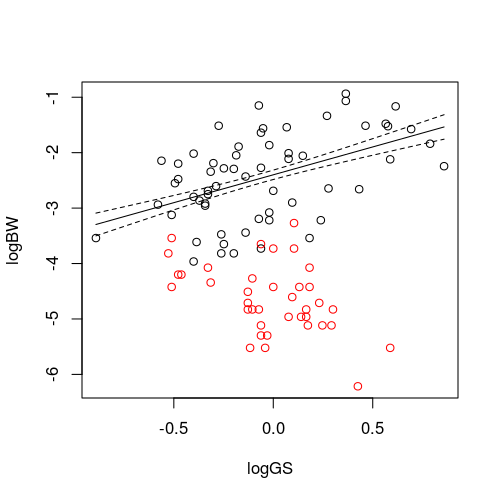

In [18]:
# plot the scatterplot of the data
plot(logBW ~ logGS, data = odonata, col = Suborder)
# add the predicted lines
lines(AnisoPred$fit ~ LogGSForFitting, col = "black")
lines(AnisoPred$fit + AnisoPred$se.fit ~ LogGSForFitting, col = "black", lty = 2)
lines(AnisoPred$fit - AnisoPred$se.fit ~ LogGSForFitting, col = "black", lty = 2)

$\star$ Copy the prediction code into your script and run the plot above.

Copy and modify the last three lines to add the lines for the Zygoptera. Your final plot should look like this:

![image](./graphics/odonPlot.svg)

---

# Model simplification

## Introduction 

In biology, we often use statistics to compare competing hypotheses in order to work out the simplest explanation for some data. This often involves collecting several explanatory variables that describe different hypotheses and then fitting them together in a single model, and often including interactions between those variables.

In all likelihood, not all of these model *terms* will be important. If we remove unimportant terms, then the explanatory power of the model will get worse, but might not get significantly worse.

> *"It can scarcely be denied that the supreme goal of all theory is to make the irreducible basic elements as simple and as few as possible without having to surrender the adequate representation of a single datum of experience."* 
>
> &ndash; *Albert Einstein*

Or to paraphrase:

> *"Everything should be made as simple as possible, but no simpler."*

The approach we will look at is to start with a *maximal model* — the model that contains everything that might be important — and simplify it towards the *null model* — the
model that says that none of your variables are important. Hopefully, there is a point somewhere in between where you can't remove any further terms without making the model significantly worse: this is called the *minimum adequate model*.

![image](./graphics/minmodflow.png)

### Section aims

The main aim of this section[$^{[1]}$](#fn1) is to learn how to build and then simplify complex models by removing non-explanatory terms, to arrive at the *Minimum Adequate Model*.

### The process of model simplification

Model simplification is an iterative process. The flow diagram below shows how it works: at each stage you try and find an acceptable simplification. If successful, then you start again with the new simpler model and try and find a way to simplify this, until eventually, you can't find anything more to remove.

![image](./graphics/maxmodflow.png)

As always, we can use an $F$-test to compare two models and see if they have significantly different explanatory power (there are also other ways to do this, such as using the Akaike Information Criterion, but we will not cover this here). In this context, the main thing to remember is that significance of the $F$-test used to compare a model and its simplified counterpart is a *bad* thing — it means that we've removed a term from the fitted model that makes it *significantly* worse.

## An example 

We'll be using the wing length dataset for this practical, so once again:

$\star$ Make sure you have changed the working directory to your stats module `code` folder.

$\star$  Create a new blank script called `MyModelSimp.R`.

$\star$  Load the wing length data into a data frame called `wings`:

In [1]:
wings <- read.csv('traitdata_Huxleyetal_2021.csv',stringsAsFactors = TRUE)

In previous sections, we looked at how the categorical variables `temp` and `food_level` predicted wing length in in *Aedes aegypti*. In this section, we will add in another continuous variable: adult lifespan. The first thing we will do is to log both variables and reduce the dataset to the rows for which all of these data are available:

In [2]:
wings$temp       <- as_factor(wings$temp)
wings$food_level <- as_factor(wings$food_level)

wings$loglength   <- log(wings$length_mm)
wings$loglifespan <- log(wings$adult_lifespan)

# reduce dataset to four key variables
wings <- subset(wings, select = c(loglength, loglifespan, temp, food_level)) 

# remove the row with missing data
wings <- na.omit(wings)

$\star$ Copy the code above into your script and run it

Check that the data you end up with has this structure:

In [3]:
str(wings)

'data.frame':	240 obs. of  5 variables:
 $ logCvalue     : num  0.94 1.322 1.381 1.545 0.888 ...
 $ logLS         : num  1.1 1.12 0 0 1.52 ...
 $ logBM         : num  10.83 4.87 11.46 10.86 3.23 ...
 $ TrophicLevel  : Factor w/ 3 levels "Carnivore","Herbivore",..: 1 2 2 2 3 3 3 2 2 3 ...
 $ GroundDwelling: Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 1 1 1 ...
 - attr(*, "na.action")=Class 'omit'  Named int [1:139] 2 4 7 9 10 11 14 15 20 21 ...
  .. ..- attr(*, "names")= chr [1:139] "2" "4" "7" "9" ...


## A Maximal model

First let's fit a model including all of these variables and all of the interactions:

In [4]:
model <- lm(formula = loglifespan ~ loglength * temp * food_level, data = wings)

$\star$ Add this model-fitting step in your script.

$\star$ Look at the output of `anova(model)` and `summary(model)`.

Scared? Don't be! There are a number of points to this exercise:

1.  These tables show exactly the kind of output you've seen before. Sure, there are lots of rows but each row is just asking whether a model term (`anova`) or a model coefficient (`summary`) is significant.

2.  Some of the rows are significant, others aren't: some of the model terms are not explanatory.

3.  The two tables show similar things - only a few stars for the `anova` table and the `summary` table.

4.  That last line in the `anova` table: `loglength:temp:food_level`. This is an interaction of three variables capturing how the slope for lifespan changes for different wing lengths for individuals in different temperature-food levels. Does this seem easy to understand?

The real lesson here is that it is easy to fit complicated models in R.

*Understanding and explaining them is a different matter*.

The temptation is always to start with the most complex possible model but this is rarely a good idea.

## A better maximal model

Instead of all possible interactions, we'll consider two-way interactions: how do pairs of variables affect each other?

There is a shortcut for this: `y ~ (a + b + c)^2` gets all two way combinations of the variables in the brackets, so is a quicker way of getting this model:

`y ~ a + b + c + a:b + a:c + b:c`

So let's use this to fit a simpler maximal model:

In [7]:
model <- lm(loglifespan ~ (loglength + temp + food_level)^2, data = wings)

The `anova` table for this model looks like this:

In [8]:
anova(model)

Df  Sum Sq     Mean Sq    F value    Pr(>F)      
logLS                         1 0.98923090 0.98923090 25.7218583 8.238435e-07
logBM                         1 3.03170122 3.03170122 78.8299165 2.175874e-16
TrophicLevel                  2 0.47787807 0.23893904  6.2128630 2.364061e-03
GroundDwelling                1 0.11043622 0.11043622  2.8715489 9.154164e-02
logLS:logBM                   1 0.27482000 0.27482000  7.1458354 8.064321e-03
logLS:TrophicLevel            2 0.19062973 0.09531487  2.4783653 8.616764e-02
logLS:GroundDwelling          1 0.13645096 0.13645096  3.5479808 6.090771e-02
logBM:TrophicLevel            2 0.08736291 0.04368145  1.1357997 3.229995e-01
logBM:GroundDwelling          1 0.88303940 0.88303940 22.9606803 3.002337e-06
TrophicLevel:GroundDwelling   2 0.04461728 0.02230864  0.5800664 5.606962e-01
Residuals                   225 8.65322208 0.03845876         NA           NA

The first lines are the *main effects*: two are significant and one isn't. Then there are the three interactions. One of these is very significant: `loglength:temp`,
which suggests that the slope of log lifespan value with wing length differs between temperatures. The other interactions are non-significant although some are close.

$\star$ Run this model in your script.

$\star$ Look at the output of `anova(model)` and `summary(model)`.

$\star$ Generate and inspect the model diagnostic plots.

## Model simplification

Now let's simplify the model we fitted above. Model simplification is not as straightforward as just dropping terms. Each time you remove a term from a model, the model will change: the model will get worse, since some of the sums of squares are no longer explained, but the remaining variables may partly compensate for this loss of explanatory power. The main point is that if it gets only a little worse, its OK, as the tiny amount of additional variation explained by the term you removed is not really worth it. 

But how much is "tiny amount"? This is what we will learn now by using the $F$-test.   Again, remember: significance of the $F$-test used to compare a model and its simplified counterpart is a *bad* thing — it means that we've removed a term from the fitted model that makes the it *significantly* worse.

The first question is: *what terms can you remove from a model*? Obviously, you only want to remove non-significant terms, but there is another rule – you cannot remove a main effect or an interaction while those main effects or interactions are present in a more complex interaction. For example, in the model `y ~ a + b + c + a:b + a:c + b:c`, you cannot drop `c` without dropping both `a:c` and `b:c`.

The R function `drop.scope` tells you what you can drop from a model. Some examples:

In [9]:
drop.scope(model)

[1] "logLS:logBM"                 "logLS:TrophicLevel"         
[3] "logLS:GroundDwelling"        "logBM:TrophicLevel"         
[5] "logBM:GroundDwelling"        "TrophicLevel:GroundDwelling"

In [10]:
drop.scope(y ~ a + b + c + a:b)

[1] "c"   "a:b"

In [11]:
drop.scope(y ~ a + b + c + a:b + b:c + a:b:c)

[1] "a:b:c"

The last thing we need to do is work out how to remove a term from a model. We could type out the model again, but there is a shortcut using the function `update`:

In [13]:
# a simple model
f <- y ~ a + b + c + b:c

# remove b:c from the current model
update(f, . ~ . - b:c)

y ~ a + b + c

In [14]:
# model g as a response using the same explanatory variables.
update(f, g ~ .)

g ~ a + b + c + b:c

Yes, the syntax is weird. The function uses a model or a formula and then allows you to alter the current formula. The dots in the code `. ~ . ` mean 'use whatever is currently in the response or explanatory variables'. It gives a simple way of changing a model.

Now that you have learned the syntax, let's try model simplification with the mammals dataset. 

From the above `anova` and `drop.scope` output, we know that the interaction `loglength:temp:food_level` is not significant and a valid term. So, let's remove this term:

In [17]:
model2 <- update(model, . ~ . - loglength:temp:food_level)

And now use ANOVA to compare the two models:

In [18]:
anova(model, model2)

Res.Df RSS      Df Sum of Sq   F         Pr(>F)   
1 225    8.653222 NA          NA        NA        NA
2 227    8.697839 -2 -0.04461728 0.5800664 0.5606962

This tells us that `model2` is *not* significantly worse than `model`. That is, dropping that one interaction term did not result in much of a loss of predictability. 

Now let's look at this simplified model and see what else can be removed:

In [19]:
anova(model2)

Df  Sum Sq     Mean Sq    F value   Pr(>F)      
logLS                  1 0.98923090 0.98923090 25.817379 7.832839e-07
logBM                  1 3.03170122 3.03170122 79.122659 1.869660e-16
TrophicLevel           2 0.47787807 0.23893904  6.235935 2.309662e-03
GroundDwelling         1 0.11043622 0.11043622  2.882213 9.093329e-02
logLS:logBM            1 0.27482000 0.27482000  7.172372 7.944702e-03
logLS:TrophicLevel     2 0.19062973 0.09531487  2.487569 8.537509e-02
logLS:GroundDwelling   1 0.13645096 0.13645096  3.561157 6.042258e-02
logBM:TrophicLevel     2 0.08736291 0.04368145  1.140018 3.216374e-01
logBM:GroundDwelling   1 0.88303940 0.88303940 23.045947 2.869667e-06
Residuals            227 8.69783936 0.03831647        NA           NA

In [20]:
drop.scope(model2)

[1] "logLS:logBM"          "logLS:TrophicLevel"   "logLS:GroundDwelling"
[4] "logBM:TrophicLevel"   "logBM:GroundDwelling"

$\star$ Add this first simplification to your script and re-run it.

$\star$  Look at the output above and decide what is the next possible term to delete

$\star$ Using the code above as a model, create `model3` as the next simplification. (remember to use `model2` in your `update` call and not `model`).

## Exercise

Now for a more difficult exercise: 

$\star$ Using the code above to guide you, try and find a minimal adequate model that you are happy with. In each step, the output of `anova(model, modelN)` should be non-significant (where $N$ is the current step).

It can be important to consider both `anova` and `summary` tables. It can be worth trying to remove things that look significant in one table but not the other — some terms can explain significant variation on the `anova` table but the coefficients are not significant.

Remember to remove *terms*: with categorical variables, several coefficients in the `summary` table may come from one term in the model and have to be removed together.

When you have got your final model, save the model as an R data file: `save(modelN, file='myFinalModel.Rda')`.

-----

<a id="fn1"></a>
[1]: Here you work with the script file `ModelSimp.R`

# Group project


Select a focal species from a choice of three datasets that contain values on trait-temperature relationships. 
Develop a hypothesis and explore the hypothesis using a linear model. Assess your model fit and assumptions.

